Author: Rohan Krishna Balaji  <br>
Course : Simulation Science <br>
Date  : 25.06.2021  <br>
Project : ICTM Analysis, Master's Thesis at Fraunhofer IPT <br>
Email : Rohan Krishna Balaji <br>
Version : 1.01 <br>
Credits : https://machinelearningmastery.com/multi-output-regression-models-with-python/

# Simple Approaches 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
# Plotting the result obtained during the study
def subplotter(low,high,X,Y,Z,a,c,X_inv,Y_inv,Z_inv, a_inv,c_inv):      # acquired and planning
    
    range = np.arange(low,high)
    fig,axs = plt.subplots(5,figsize=(10,15))

    axs[0].plot(range,X[range],label = 'Ground Truth x', color='blue')
    axs[0].plot(range,X_inv[range],label = 'ML x', color='red')
    axs[0].legend() 
    axs[0].set_xlabel('row index (dimension less)')
    axs[0].set_ylabel('x in mm')
    #axs[0].set_title('X data comparison')   
    
    axs[1].plot(range,Y[range], label = 'Ground Truth y', color='blue')
    axs[1].plot(range,Y_inv[range], label = 'ML x', color='red') 
    axs[1].legend()
    axs[1].set_xlabel('row index (dimension less)')
    axs[1].set_ylabel('y in mm')
   # axs[1].set_title('Y data comparison')   
    

    axs[2].plot(range,Z[range], label = 'Ground Truth z', color='blue')
    axs[2].plot(range,Z_inv[range] , label = 'ML z', color='red')
    axs[2].legend()
    axs[2].set_xlabel('row index (dimension less)')
    axs[2].set_ylabel('z in mm')
    #axs[2].set_title('Z data comparison')   
    
    axs[3].plot(range,a[range], label = 'Ground Truth a', color='blue')
    axs[3].plot(range,a_inv[range] , label = 'ML a', color='red')
    axs[3].legend()
    axs[3].set_xlabel('row index (dimension less)')
    axs[3].set_ylabel('a in mm')
    
    axs[4].plot(range,c[range], label = 'Ground Truth c', color='blue')
    axs[4].plot(range,c_inv[range] , label = 'ML c', color='red')
    axs[4].legend()
    axs[4].set_xlabel('row index (dimension less)')
    axs[4].set_ylabel('c in mm')
    
    
    fig.canvas.draw()
    fig.canvas.flush_events()


In [3]:
#df = pd.read_csv('Blockwise/combined_df_'+str(1030)+'.csv')
df = pd.read_csv('Blisk/full_blisk.csv')
df.shape

(1685106, 71)

In [4]:
df.columns

Index(['Unnamed: 0', 'Leading angle', 'Side tilt angle',
       'Surface Contact point X', 'Surface contact point Y',
       'Surface contact point z', 'Surface Orietation X',
       'Surface Orietation Y', 'Surface Orietation Z', 'Tool Tip Point X',
       'Tool Tip Point Y', 'Tool Tip Point Z', 'Tool Orientation X',
       'Tool Orientation Y', 'Tool Orientation Z',
       'Closes Point Distance (Surface Contact Point - Acquired TCP 1030 blade0)',
       'time', 'MachineX', 'MachineY', 'MachineZ', 'MachineA', 'MachineC',
       'LoadSpindle', 'TransfX', 'TransfY', 'TransfZ', 'TransfI', 'TransfJ',
       'TransfK', 'executionDuration', 'previousExecutionDuration',
       'relativeTimetoPreviousCall program number', 'timeStamp', 'Tool Length',
       'Tool Radius', 'G54-X', 'G54-Y', 'G54-Z', 'G54-A', 'G54-C',
       'ProgNumber', 'Blade', 'Fx_mean', 'Fy_mean', 'Fz_mean', 'Mz_mean',
       'Fc_mean', 'Fa_mean', 'FcN_mean', 'Fres_mean', 'Fx_sigma', 'Fy_sigma',
       'Fz_sigma', 'Mz_sigm

In [5]:
X = df[['Leading angle','Side tilt angle','Tool Tip Point X',
       'Tool Tip Point Y', 'Tool Tip Point Z', 'Tool Orientation X',
       'Tool Orientation Y', 'Tool Orientation Z',]].copy(deep=True)
y = df[['MachineX', 'MachineY', 'MachineZ', 'MachineA', 'MachineC']].copy(deep=True)

X = X.to_numpy()
y = y.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Multi-Output Regression

In [6]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()

model_reg.fit(X_train,y_train)
y_reg = model_reg.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_reg,multioutput='raw_values')

array([3.03154602e+01, 3.12080157e+01, 1.03266402e+01, 2.33583339e+00,
       1.07942269e+04])

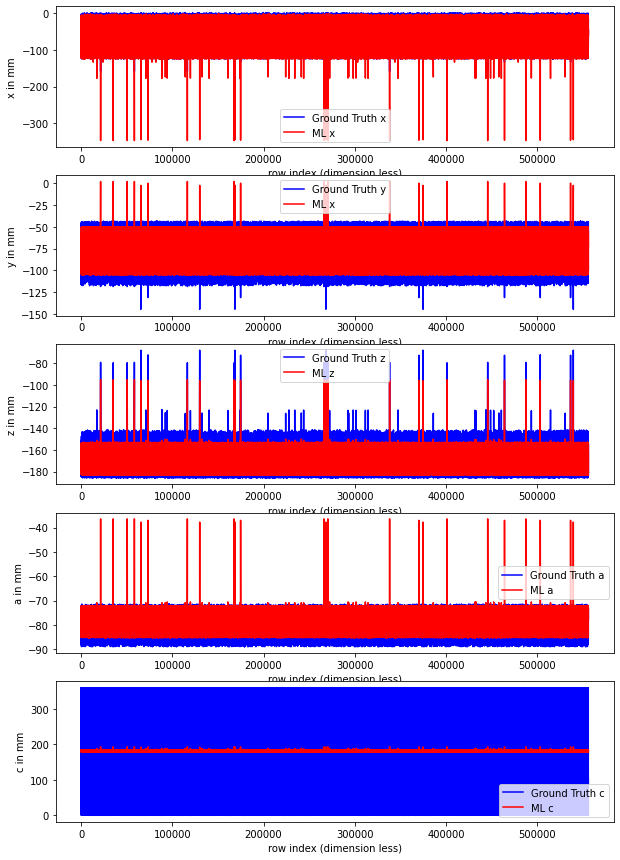

In [8]:
subplotter(0,y_test.shape[0], y_test[:,0],y_test[:,1],y_test[:,2],y_test[:,3],y_test[:,4], y_reg[:,0], y_reg[:,1], y_reg[:,2],y_reg[:,3] ,y_reg[:,4] )

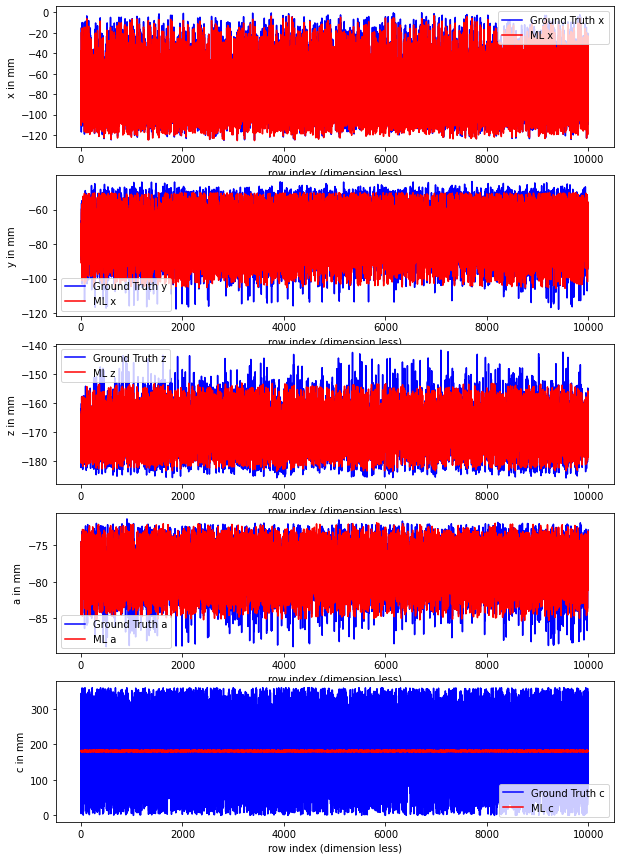

In [9]:
subplotter(0,10000, y_test[:,0],y_test[:,1],y_test[:,2],y_test[:,3],y_test[:,4], y_reg[:,0], y_reg[:,1], y_reg[:,2],y_reg[:,3] ,y_reg[:,4] )

# KNN Multi Output Regression

In [10]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor()

model_knn.fit(X_train,y_train)
y_knn = model_reg.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_knn, multioutput='raw_values')

array([3.03154602e+01, 3.12080157e+01, 1.03266402e+01, 2.33583339e+00,
       1.07942269e+04])

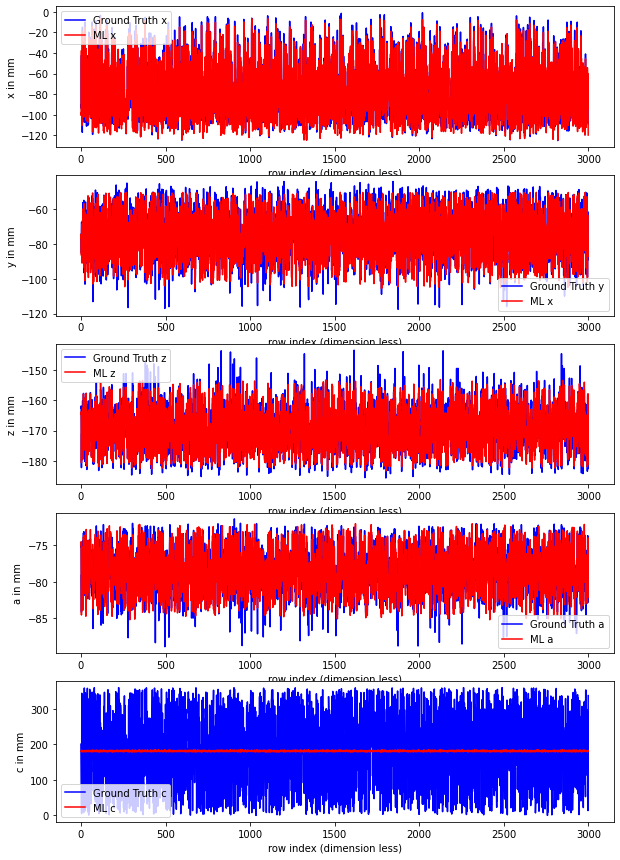

In [12]:
subplotter(0,3000, y_test[:,0],y_test[:,1],y_test[:,2],y_test[:,3],y_test[:,4], y_knn[:,0], y_knn[:,1], y_knn[:,2],y_knn[:,3] ,y_knn[:,4] )

# Decision Trees

In [13]:
from sklearn.tree import DecisionTreeRegressor
model_dt =  DecisionTreeRegressor()

model_dt.fit(X_train,y_train)
y_dt = model_reg.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_dt,multioutput='raw_values')

array([3.03154602e+01, 3.12080157e+01, 1.03266402e+01, 2.33583339e+00,
       1.07942269e+04])

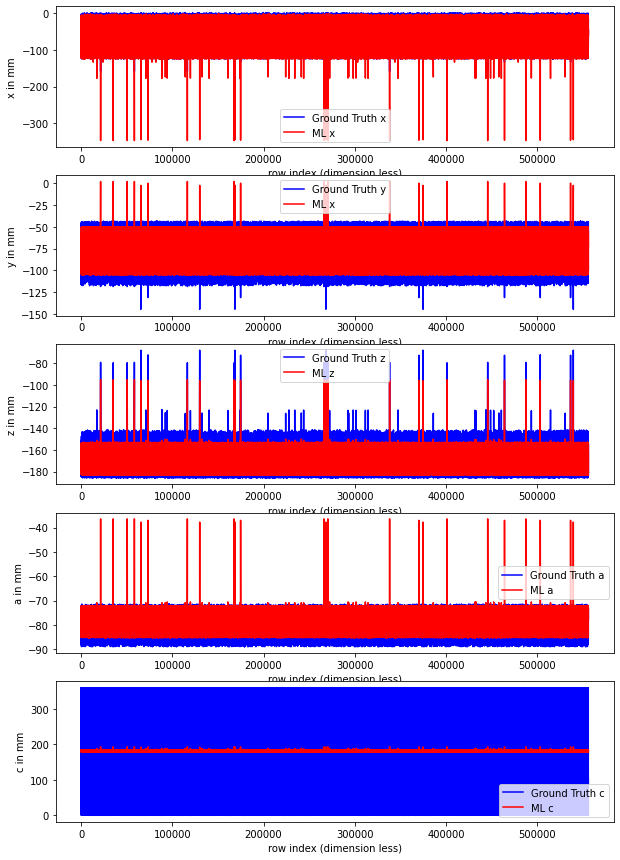

In [15]:
subplotter(0,y_test.shape[0], y_test[:,0],y_test[:,1],y_test[:,2],y_test[:,3],y_test[:,4], y_dt[:,0], y_dt[:,1], y_dt[:,2],y_dt[:,3] ,y_dt[:,4] )

# Random Forest Mutli Output Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=5)

model_rf.fit(X_train,y_train)
y_rf = model_reg.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_rf ,multioutput='raw_values')

array([3.03154602e+01, 3.12080157e+01, 1.03266402e+01, 2.33583339e+00,
       1.07942269e+04])

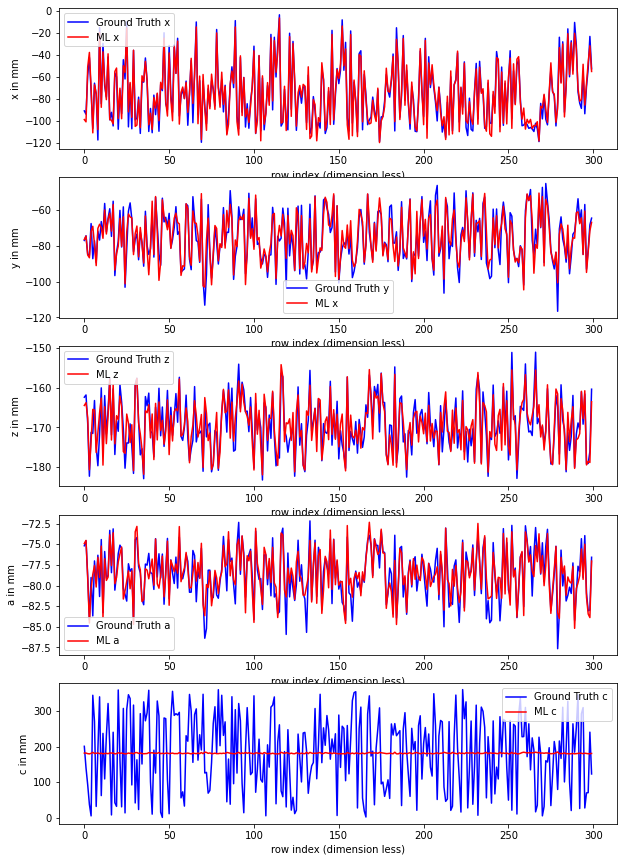

In [18]:
subplotter(0,300, y_test[:,0],y_test[:,1],y_test[:,2],y_test[:,3],y_test[:,4], y_rf[:,0], y_rf[:,1], y_rf[:,2],y_rf[:,3] ,y_rf[:,4] )

# Gradient Boost with Wrapper (for multi output regression)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

model_gb = GradientBoostingRegressor(n_estimators=10)

wrapper =  MultiOutputRegressor(model_gb)

wrapper.fit(X_train,y_train)
y_gb = wrapper.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_gb ,multioutput='raw_values')

array([1.26178779e+02, 5.16993147e+01, 1.55493250e+01, 2.65235794e+00,
       1.07914794e+04])

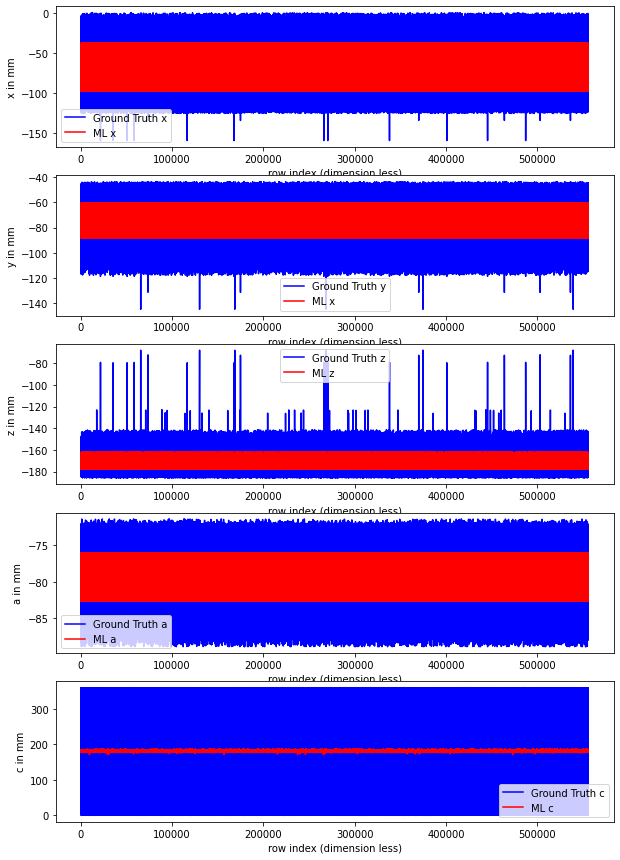

In [21]:
subplotter(0,len(y_test), y_test[:,0],y_test[:,1],y_test[:,2],y_test[:,3],y_test[:,4], y_gb[:,0], y_gb[:,1], y_gb[:,2],y_gb[:,3] ,y_gb[:,4] )

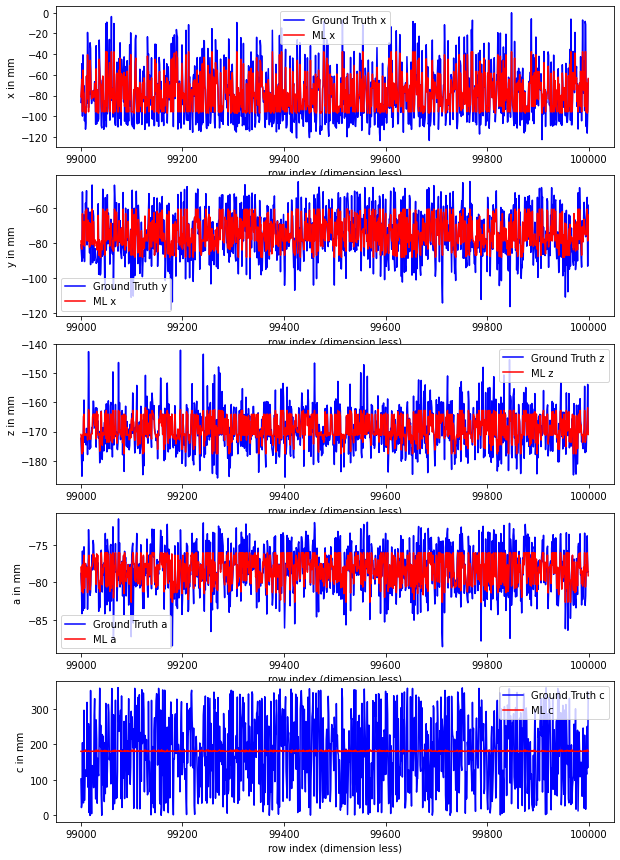

In [22]:
subplotter(99000,100000, y_test[:,0],y_test[:,1],y_test[:,2],y_test[:,3],y_test[:,4], y_gb[:,0], y_gb[:,1], y_gb[:,2],y_gb[:,3] ,y_gb[:,4] )

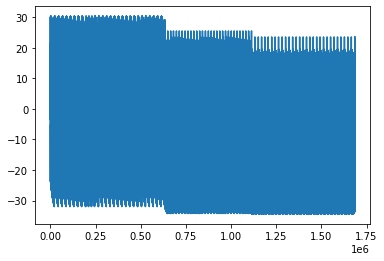

In [23]:
plt.plot(df['Tool Tip Point X'])

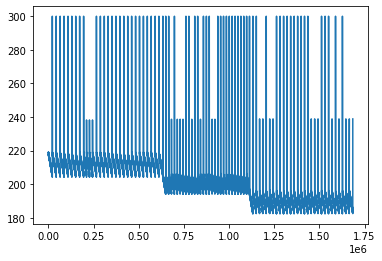

In [24]:
plt.plot(df['Tool Tip Point Y'])

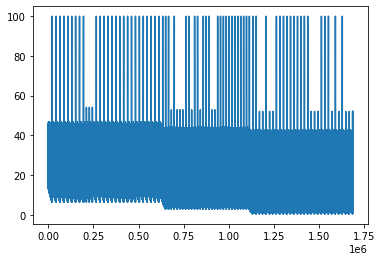

In [25]:
plt.plot(df['Tool Tip Point Z'])

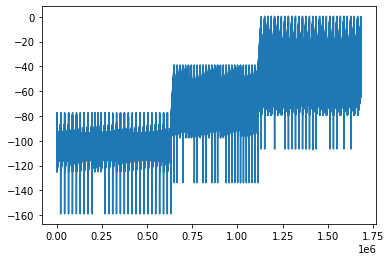

In [26]:
plt.plot(df[ 'MachineX'])

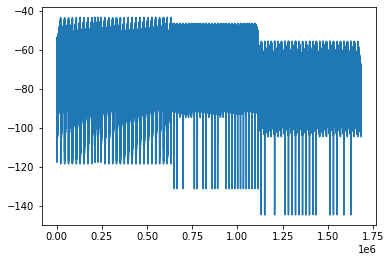

In [27]:
plt.plot(df[ 'MachineY'])

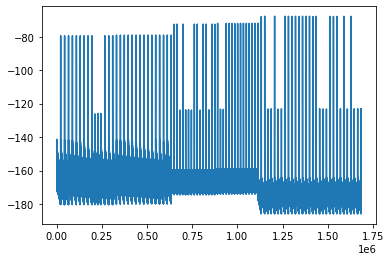

In [28]:
plt.plot(df[ 'MachineZ'])

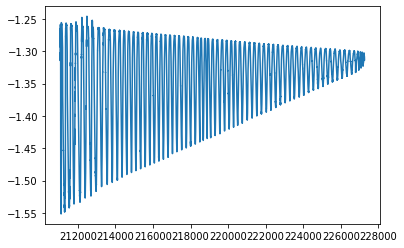

In [29]:
plt.plot(np.deg2rad(df[ 'MachineA'].iloc[211059:227268 ]))

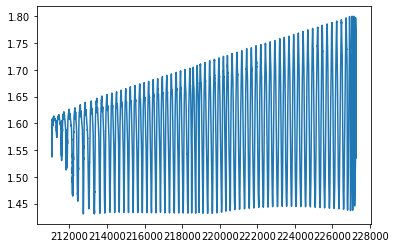

In [30]:
plt.plot(np.deg2rad(df[ 'MachineC'].iloc[211059:227268 ]))

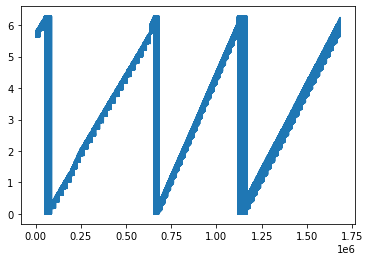

In [31]:
plt.plot(np.deg2rad(df[ 'MachineC']))